In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
LSTM_data = pd.read_csv('LSTM_conflicting_comments.csv')
CNN_data = pd.read_csv('CNN_conflicting_comment .csv')
CNN_data.sample(5)

,created,comment_id,author,body,parent_id,submission_id,score,subreddit,subreddit_id,submission_group,comment_group,timestamp,linked_users,linked_subreddits,processed_body,Negative,Neutral,Positive
7117,1458221211,d137b89,njmaverick,No doubt some of the sheeple in the GOP pens b...,t1_d1379f1,4asxnf,2,politics,t5_2cneq,democrats,democrats,3/17/2016 9:26,[],[],doubt significant otherme sheeple goriginal po...,0.886054,0.081947,0.031999
4225,1539353688,e7mxi6b,backtoreality00,> past *200 years*,t1_e7ml3q7,9ninfi,1,politics,t5_2cneq,democrats,democrats,10/12/2018 10:14,[],[],past years,0.209124,0.586097,0.204779
6950,1459259550,d1hnavi,njmaverick,better get busy on your Bernie is a liar memes...,t1_d1hn1g8,4cfa9d,2,politics,t5_2cneq,democrats,democrats,3/29/2016 9:52,[],[],better busy bernie liar me-mailes http politif...,0.739467,0.212296,0.048237
6686,1463679009,d3bu6ty,njmaverick,nothing you claimed is factually or contextual...,t1_d3bu39t,4k21y5,0,politics,t5_2cneq,democrats,democrats,5/19/2016 13:30,[],[],nothing clainstant message factually contextua...,0.890219,0.065262,0.044519
4036,1541695989,e9atwhg,HillbillyPartySloth,"An individual is a member. I am a Democrat, a ...",t1_e9ats99,9vams5,4,politics,t5_2cneq,democrats,democrats,11/8/2018 11:53,[],[],individual me-mailber de-mailoriginal contentr...,0.957972,0.031707,0.010322


In [10]:
LSTM_data.columns

Index(['created', 'comment_id', 'author', 'body', 'parent_id', 'submission_id',
       'score', 'subreddit', 'subreddit_id', 'submission_group',
       'comment_group', 'timestamp', 'linked_users', 'linked_subreddits',
       'processed_body', 'Negative', 'Neutral', 'Positive'],
      dtype='object')

In [27]:
# LSTM_data['Cumulative'] = (LSTM_data['Neutral'] - LSTM_data['Neutral']) + (LSTM_data['Positive'] - LSTM_data['Neutral']) - (LSTM_data['Negative'] + LSTM_data['Neutral'])
CNN_data['Cumulative'] = (CNN_data['Neutral'] - CNN_data['Neutral']) + (CNN_data['Positive'] - CNN_data['Neutral']) - (CNN_data['Negative'] + CNN_data['Neutral'])

In [28]:
CNN_data[['Cumulative', 'submission_group', 'comment_group', 'Negative', 'Positive', 'Neutral']]

,Cumulative,submission_group,comment_group,Negative,Positive,Neutral
0,-0.359603,Republican,Republican,0.194476,0.481973,0.323550
1,-1.005282,Republican,Republican,0.805576,0.063047,0.131377
2,-0.934133,Republican,Republican,0.139376,0.308830,0.551794
3,-1.038110,Republican,Republican,0.612627,0.116421,0.270952
4,-0.947940,Republican,Republican,0.642659,0.136467,0.220874
5,-0.751812,Republican,Republican,0.597667,0.216840,0.185493
6,-0.862657,Republican,Republican,0.762184,0.125053,0.112763
7,-1.383642,Republican,Republican,0.537351,0.026336,0.436314
8,-0.903408,Republican,Republican,0.663318,0.144425,0.192257
9,-1.169575,Republican,Republican,0.177443,0.217661,0.604897


In [29]:
LSTM_data

,created,comment_id,author,body,parent_id,submission_id,score,subreddit,subreddit_id,submission_group,comment_group,timestamp,linked_users,linked_subreddits,processed_body,Negative,Neutral,Positive,Cumulative
0,1432869679,crofq47,ljrdxyh,Should win Iowa and probably wins New Hampshir...,t1_crofp5c,37o59g,3,politics,t5_2cneq,Republican,Republican,5/28/2015 23:21,[],[],iowa probably win hampshire real test signific...,0.076843,0.228441,0.694716,0.160992
1,1432867687,croeoyz,ljrdxyh,"Well - the people have been there all along, R...",t1_croe8j8,37o59g,5,politics,t5_2cneq,Republican,Republican,5/28/2015 22:48,[],[],well peoriginal posterle along rand correctly ...,0.812971,0.125538,0.061491,-1.002557
2,1432867596,croen90,ljrdxyh,His record? How so?,t1_croeh7y,37o59g,7,politics,t5_2cneq,Republican,Republican,5/28/2015 22:46,[],[],record significant,0.393545,0.352866,0.253589,-0.845688
3,1432869615,crofoyq,ljrdxyh,Agree that it is their responsibility.....whic...,t1_crofneg,37o59g,2,politics,t5_2cneq,Republican,Republican,5/28/2015 23:20,[],[],agree reddit enhancement suiteponsibilithank g...,0.711326,0.167701,0.120973,-0.925755
4,1432869408,crofl4c,ljrdxyh,"From one of the comments on the link: ""left p...",t1_crof082,37o59g,23,politics,t5_2cneq,Republican,Republican,5/28/2015 23:16,[],[],comment linokay leave plenthank looriginal pos...,0.574429,0.209318,0.216252,-0.776813
5,1420345376,cndsu36,ljrdxyh,Kinds of guessed it would....but i tried....,t1_cndsm26,2r9ohg,1,politics,t5_2cneq,Republican,Republican,1/3/2015 23:22,[],[],okayinds guess would try,0.500789,0.137815,0.361396,-0.415022
6,1419927453,cn963kg,ljrdxyh,Ha!\n\nLet me educate you.......libertarians a...,t1_cn95w7m,2qsny9,-3,politics,t5_2cneq,Republican,Republican,12/30/2014 3:17,[],[],educate libertarians rinstagramht paul educati...,0.873284,0.098003,0.028713,-1.040578
7,1399608372,chddpsr,ljrdxyh,You have to fact-check fact-check.....from the...,t1_chdd1zq,253lae,3,politics,t5_2cneq,Republican,Republican,5/9/2014 0:06,[],[],fact checokay fact checokay horse mouth https ...,0.667983,0.320936,0.011081,-1.298775
8,1395940148,cgdduac,ljrdxyh,"Nah, maybe no clap for the current regime.",t1_cgdcaof,21gimq,1,politics,t5_2cneq,Republican,Republican,3/27/2014 13:09,[],[],maybe clap yourrent reginstant messagee,0.812495,0.156177,0.031328,-1.093521
9,1395946409,cgdh3lu,ljrdxyh,Amen.,t1_cgdehnx,21gimq,1,politics,t5_2cneq,Republican,Republican,3/27/2014 14:53,[],[],amen,0.330647,0.279143,0.390211,-0.498721


## Performing Analysis on LSTM Data

### Democrats -> Democrats

In [68]:
dem_dem = LSTM_data.loc[(LSTM_data['submission_group'] == 'democrats') & (LSTM_data['comment_group'] == 'democrats')]

In [69]:
dem_dem['timestamp'] = pd.to_datetime(dem_dem['timestamp'])
dem_dem.set_index('timestamp', inplace=True)

C:\Users\Paridhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
dem_dem.dtypes

created               object
comment_id            object
author                object
body                  object
parent_id             object
submission_id         object
score                 object
subreddit             object
subreddit_id          object
submission_group      object
comment_group         object
linked_users          object
linked_subreddits     object
processed_body        object
Negative             float64
Neutral              float64
Positive             float64
Cumulative           float64
dtype: object

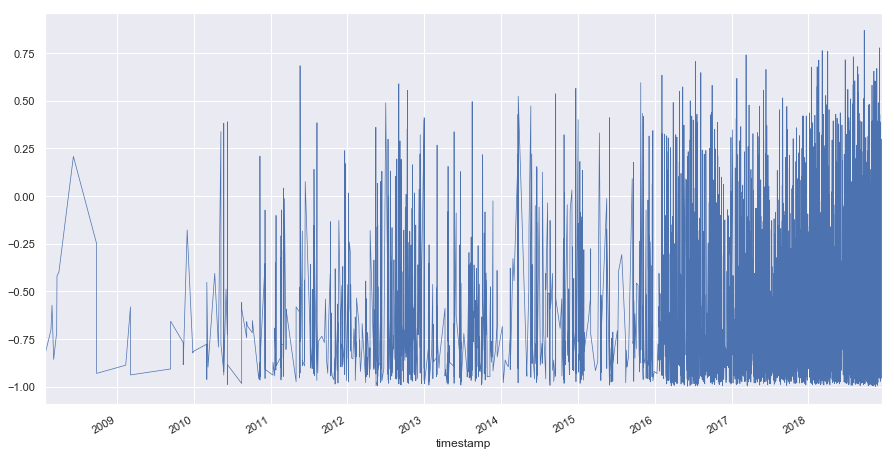

In [111]:
sns.set(rc={'figure.figsize':(15, 8)})
(dem_dem['Positive'] -dem_dem['Negative']).plot(linewidth=0.7);
# plt.axhline(0, color='black')

### Dem -> Rep

In [75]:
dem_rep = LSTM_data.loc[(LSTM_data['submission_group'] == 'democrats') & (LSTM_data['comment_group'] == 'Republican')]
dem_rep['timestamp'] = pd.to_datetime(dem_rep['timestamp'])
dem_rep.set_index('timestamp', inplace=True)

C:\Users\Paridhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


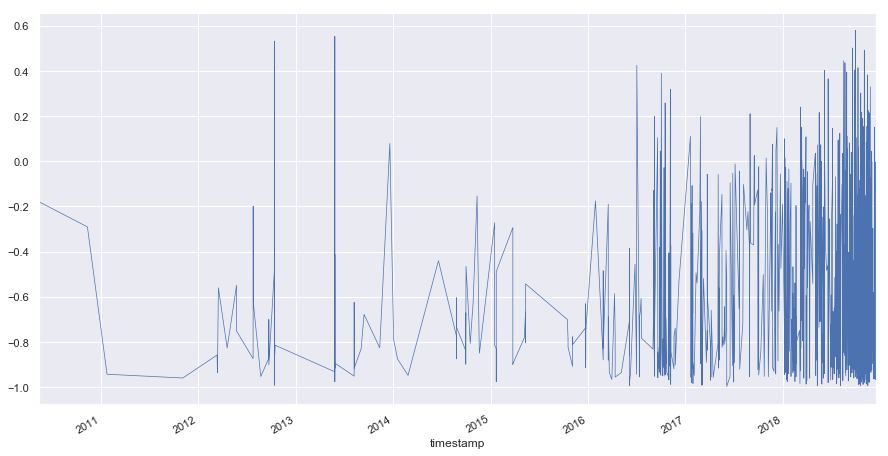

In [109]:
sns.set(rc={'figure.figsize':(15, 8)})
(dem_rep['Positive']-dem_rep['Negative']).plot(linewidth=0.7);
# (dem_rep['Neutral']).plot(c='yellow', linewidth=0.5);

### Republic -> Republic

In [79]:
rep_rep = LSTM_data.loc[(LSTM_data['submission_group'] == 'Republican') & (LSTM_data['comment_group'] == 'Republican')]
rep_rep['timestamp'] = pd.to_datetime(rep_rep['timestamp'])
rep_rep.set_index('timestamp', inplace=True)

C:\Users\Paridhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


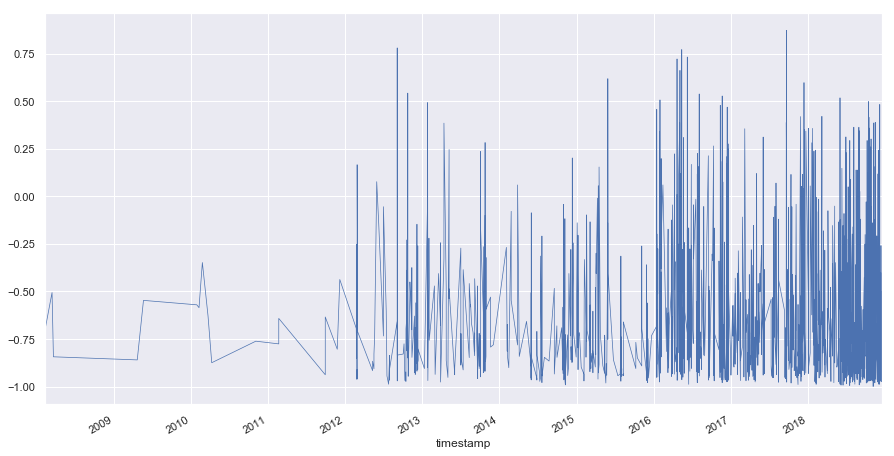

In [112]:
(rep_rep['Positive']-rep_rep['Negative']).plot(linewidth=0.7);
# plt.axhline(0, color='black')

### Republic -> Democrat

In [113]:
rep_dem = LSTM_data.loc[(LSTM_data['submission_group'] == 'Republican') & (LSTM_data['comment_group'] == 'democrats')]
rep_dem['timestamp'] = pd.to_datetime(rep_dem['timestamp'])
rep_dem.set_index('timestamp', inplace=True)

C:\Users\Paridhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


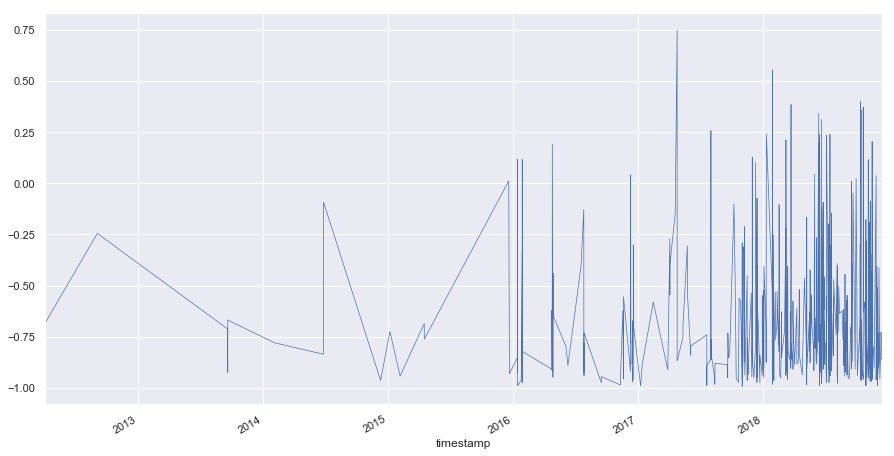

In [115]:
(rep_dem['Positive']-rep_dem['Negative']).plot(linewidth=0.7);

### Counting the frequencies

In [125]:
ddp = len(dem_dem[dem_dem['Positive'] > dem_dem['Negative']])/len(dem_dem + dem_rep)
ddn = len(dem_dem[dem_dem['Negative'] > dem_dem['Positive']])/len(dem_dem + dem_rep)
drp = len(dem_rep[dem_rep['Positive'] > dem_rep['Negative']])/len(dem_dem + dem_rep)
drn = len(dem_rep[dem_rep['Negative'] > dem_rep['Positive']])/len(dem_dem + dem_rep)
rrp = len(rep_dem[rep_dem['Positive'] > rep_dem['Negative']])/len(rep_rep + rep_dem)
rrn = len(rep_dem[rep_dem['Negative'] > rep_dem['Positive']])/len(rep_rep + rep_dem)
rdp = len(rep_rep[rep_rep['Positive'] > rep_rep['Negative']])/len(rep_rep + rep_dem)
rdn = len(rep_rep[rep_rep['Negative'] > rep_rep['Positive']])/len(rep_rep + rep_dem)

In [126]:
rdn

0.7213659715926262

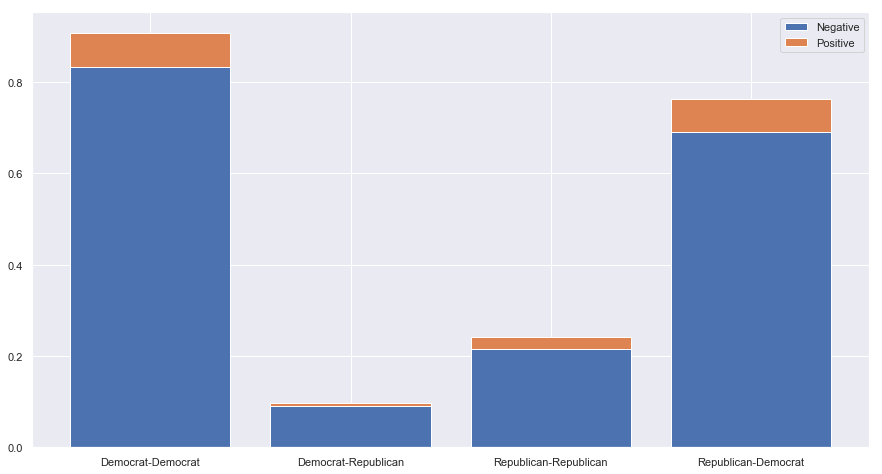

In [146]:
p1 = plt.bar(['Democrat-Democrat', 'Democrat-Republican', 'Republican-Republican', 'Republican-Democrat'], [ddn, drn, rrn, rdn])
p2 = plt.bar(['Democrat-Democrat', 'Democrat-Republican', 'Republican-Republican', 'Republican-Democrat'], [ddp, drp, rrp, rdp], bottom=[ddn, drn, rrn, rdn])
plt.legend((p1, p2), ('Negative', 'Positive'))

## CNN model

### Democrats -> Democrats

In [132]:
dem_dem_c = CNN_data.loc[(CNN_data['submission_group'] == 'democrats') & (CNN_data['comment_group'] == 'democrats')]

In [133]:
dem_dem_c['timestamp'] = pd.to_datetime(dem_dem_c['timestamp'])
dem_dem_c.set_index('timestamp', inplace=True)

C:\Users\Paridhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [134]:
dem_dem_c.dtypes

created               object
comment_id            object
author                object
body                  object
parent_id             object
submission_id         object
score                 object
subreddit             object
subreddit_id          object
submission_group      object
comment_group         object
linked_users          object
linked_subreddits     object
processed_body        object
Negative             float64
Neutral              float64
Positive             float64
Cumulative           float64
dtype: object

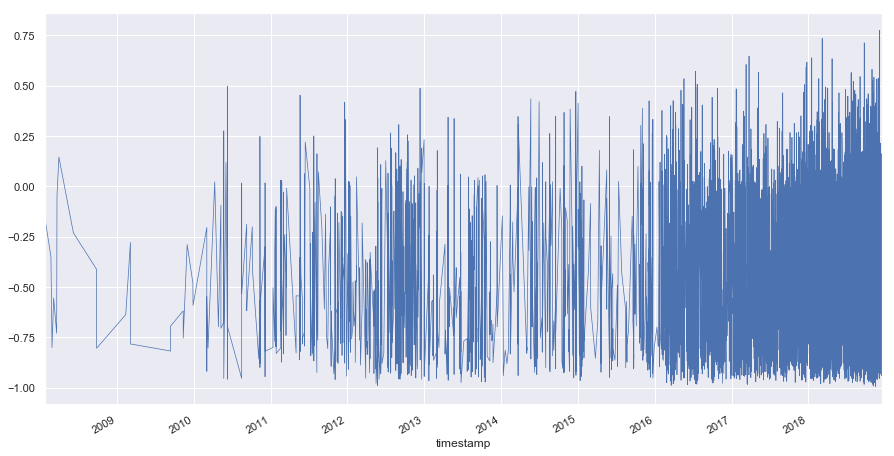

In [135]:
sns.set(rc={'figure.figsize':(15, 8)})
(dem_dem_c['Positive'] -dem_dem_c['Negative']).plot(linewidth=0.7);
# plt.axhline(0, color='black')

### Dem -> Rep

In [136]:
dem_rep_c = CNN_data.loc[(CNN_data['submission_group'] == 'democrats') & (CNN_data['comment_group'] == 'Republican')]
dem_rep_c['timestamp'] = pd.to_datetime(dem_rep_c['timestamp'])
dem_rep_c.set_index('timestamp', inplace=True)

C:\Users\Paridhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


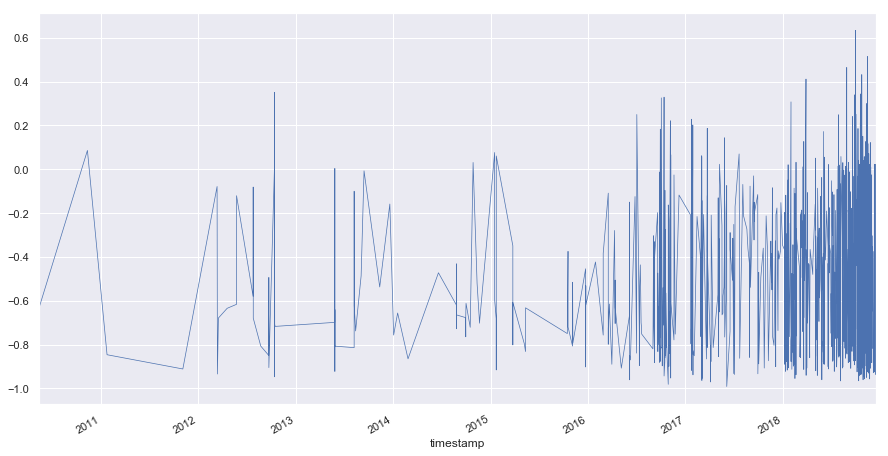

In [137]:
sns.set(rc={'figure.figsize':(15, 8)})
(dem_rep_c['Positive']-dem_rep_c['Negative']).plot(linewidth=0.7);
# (dem_rep_c['Neutral']).plot(c='yellow', linewidth=0.5);

### Republic -> Republic

In [138]:
rep_rep_c = CNN_data.loc[(CNN_data['submission_group'] == 'Republican') & (CNN_data['comment_group'] == 'Republican')]
rep_rep_c['timestamp'] = pd.to_datetime(rep_rep_c['timestamp'])
rep_rep_c.set_index('timestamp', inplace=True)

C:\Users\Paridhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


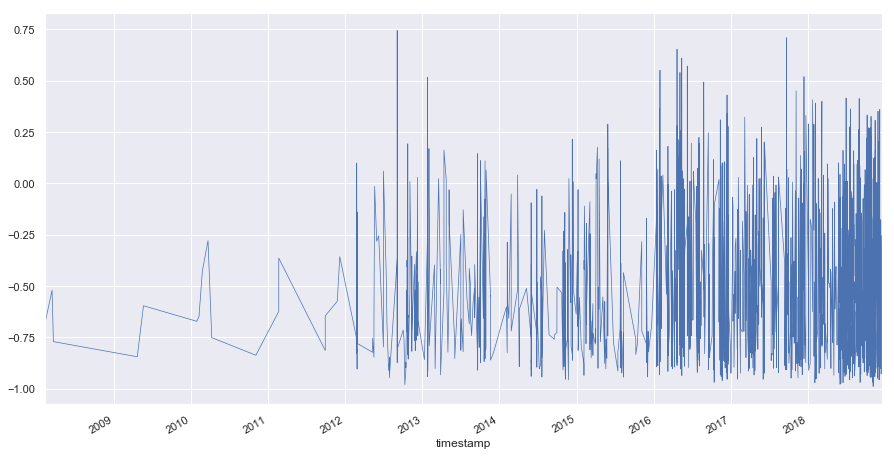

In [139]:
(rep_rep_c['Positive']-rep_rep_c['Negative']).plot(linewidth=0.7);
# plt.axhline(0, color='black')

### Republic -> Democrat

In [140]:
rep_dem_c = CNN_data.loc[(CNN_data['submission_group'] == 'Republican') & (CNN_data['comment_group'] == 'democrats')]
rep_dem_c['timestamp'] = pd.to_datetime(rep_dem_c['timestamp'])
rep_dem_c.set_index('timestamp', inplace=True)

C:\Users\Paridhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


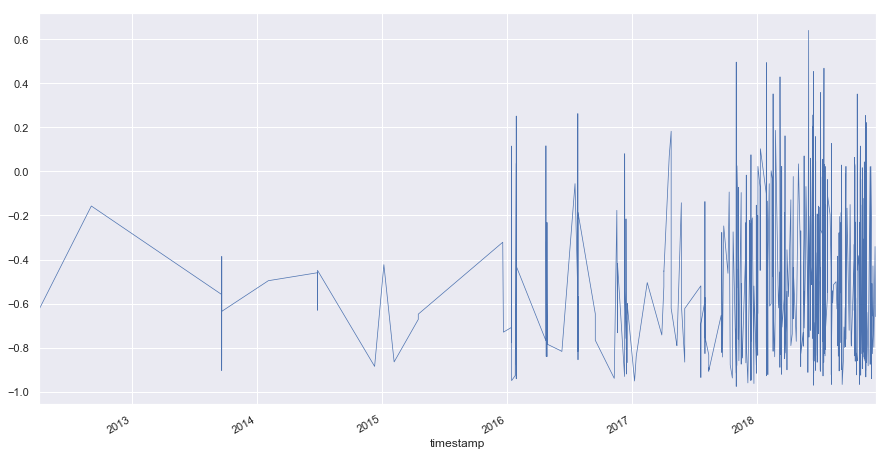

In [141]:
(rep_dem_c['Positive']-rep_dem_c['Negative']).plot(linewidth=0.7);

### Counting the frequencies

In [142]:
ddp = len(dem_dem_c[dem_dem_c['Positive'] > dem_dem_c['Negative']])/len(dem_dem_c + dem_rep_c)
ddn = len(dem_dem_c[dem_dem_c['Negative'] > dem_dem_c['Positive']])/len(dem_dem_c + dem_rep_c)
drp = len(dem_rep_c[dem_rep_c['Positive'] > dem_rep_c['Negative']])/len(dem_dem_c + dem_rep_c)
drn = len(dem_rep_c[dem_rep_c['Negative'] > dem_rep_c['Positive']])/len(dem_dem_c + dem_rep_c)
rrp = len(rep_dem_c[rep_dem_c['Positive'] > rep_dem_c['Negative']])/len(rep_rep_c + rep_dem_c)
rrn = len(rep_dem_c[rep_dem_c['Negative'] > rep_dem_c['Positive']])/len(rep_rep_c + rep_dem_c)
rdp = len(rep_rep_c[rep_rep_c['Positive'] > rep_rep_c['Negative']])/len(rep_rep_c + rep_dem_c)
rdn = len(rep_rep_c[rep_rep_c['Negative'] > rep_rep_c['Positive']])/len(rep_rep_c + rep_dem_c)

In [143]:
rdn

0.6896343306134783

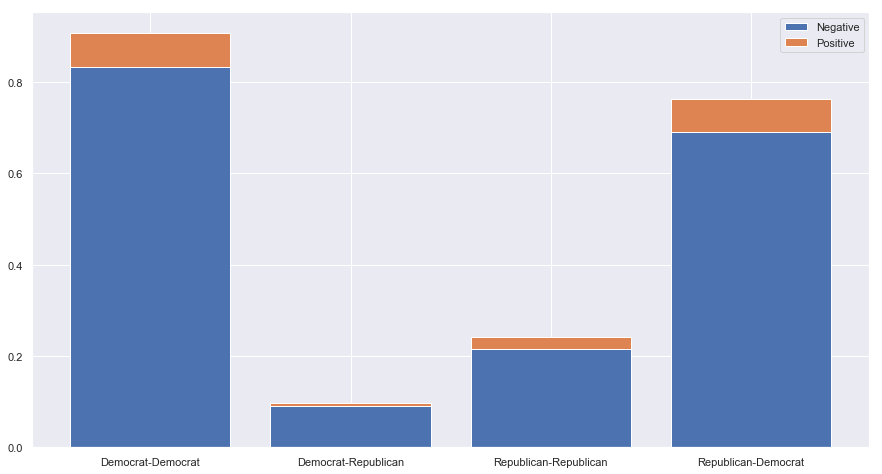

In [145]:
p1 = plt.bar(['Democrat-Democrat', 'Democrat-Republican', 'Republican-Republican', 'Republican-Democrat'], [ddn, drn, rrn, rdn])
p2 = plt.bar(['Democrat-Democrat', 'Democrat-Republican', 'Republican-Republican', 'Republican-Democrat'], [ddp, drp, rrp, rdp], bottom=[ddn, drn, rrn, rdn])
plt.legend((p1, p2), ('Negative', 'Positive'))